<a href="https://colab.research.google.com/github/Sherlysukmadira/DIF62130_A_25_2311532015_SHERLY-SUKMADIRA-PUTRI/blob/main/Praktikum2/LogistikRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

#load dataset
dataset_url = 'https://raw.githubusercontent.com/Sherlysukmadira/DIF62130_A_25_2311532015_SHERLY-SUKMADIRA-PUTRI/refs/heads/main/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**SELECTING FEATURE **

tahap ini kita membagu data menjadi 2 buah tipe data yaitu varibel independen dan variabel dependen

In [13]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin','BMI', 'Age', 'SkinThickness', 'DiabetesPedigreeFunction', 'Outcome']
X = df[feature_cols]
Y = df.Outcome

In [14]:
print (X.shape)
print (Y.shape) #Karna outcomenya hanya 1 kolom jadi yg tampil barisnya aja

(768, 9)
(768,)


**SPLITTING DATA **

membagi data set menjadi 70% data training dan 30% data testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

MODEL DEVELOPMENT AND PREDICTION

---



In [23]:
from sklearn.linear_model import LogisticRegression

#Instantiate model
logreg = LogisticRegression(random_state= 16)

#fit the model dengan data menggunakan data latih
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**MODEL EVALUATION USING CONFUSION MATRIX**

confusion matrik ini merupakan sebuah tabel yang berfungsi untuk mengevaluasi kinerja model khususnya model klasifikasi

ada 4 metode utama pada confusion matrik ini :
1.   True Positif --> hasil positif dan sesuai dengan aslinya
2.   True Negatif --> hasil Negatif dan sesuai dengan aslinya
3. false positif  --> hasil positif namun aslinya negatif
4. false negatif  --> hasil negatif namun aslinya positif



In [25]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)   #hasil yang sebenernya ada di Y_test, namun hasil yang kita uji itu ada di Y_pred nanti kita bandingkan sesuai apa ga
cnf_matrix

array([[146,   0],
       [  0,  85]])

146 true positif, 0 false positif
0 false negatif, 85 true negatif

In [20]:
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 1]


In [22]:
print(Y_test)

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64


Text(0.5, 427.9555555555555, 'Predicted label')

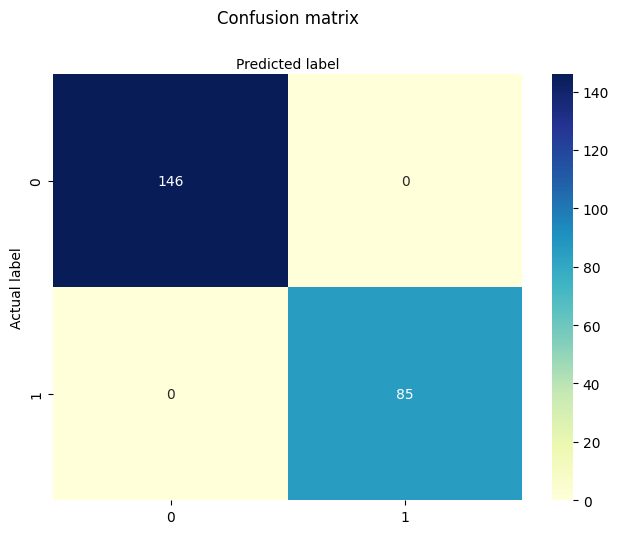

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

CONFUSION MATRIX EVALUATION METRICS

dari confusion kita bisa menghitung berbagai metrik evaluasi untuk memahami pefroma model.

1. akurasi --> seberapa sering model
2. presisi
seberapa banyak prediksi positif yang benar, berguna jika ingin menghindari terlalu banyak false positif
3. Recall atau sensitivity
seberapa baik model menangkap kasus positif, penting dalam kasus dimana kita ingin meminimalkan false negatif misal dalam diagnosa penyakit
4. F1-Store
merupakan rata2 harmonis antara presisi dan recall berfungsi untuk keseimbangan antara presisi dan  recal
5. Specificity

In [28]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))


                  precision    recall  f1-score   support

without diabetes       1.00      1.00      1.00       146
   with diabetes       1.00      1.00      1.00        85

        accuracy                           1.00       231
       macro avg       1.00      1.00      1.00       231
    weighted avg       1.00      1.00      1.00       231



ROC curva

digunakan untuk mengevaluasi kinerja model klasifikasi, terutama dalam binary classification. ROC menunjukan keseimbangan antara True Positif dan False Positif Rate pada berbagai ambang batas (threshold)

ROC curve yang bagus mendekati pojok kiri atas menandakan model memiliki banyak true positif dan sedikit false positive

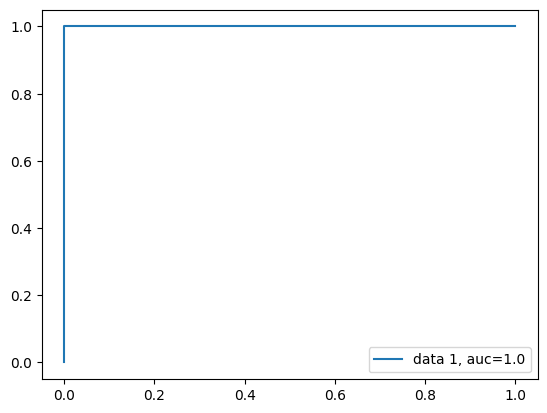

In [29]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


AUC merupakan area di bawah kurva. Fungsinya untuk mengukur seberapa baik model membedakan class positif dan negatif semakin tinggi atau mendekati 1 nilai aucnya makan semakin bagus. Kurva yang di atas merupakan area yang salah prediksi dan yang di bawah ialah yang benar